In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

The cell below shows the fucntion to detect the edges in image without using numpy for multiplication and addition of 2-D array.

In [ ]:
def sobel_without_np(image):
  '''In this function the edge detection opertion is performed without using numpy for the multiplication between kernel and image'''
  Gx = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])
  Gy = np.array([[1, 2, 1],
                 [0, 0, 0],
                 [-1, -2, -1]])
  H, W = image.shape
  sobel_image = np.zeros(shape=(H,W))
  for i in range(H-2):
    for j in range(W-2):
      Gx_A = mul_add(Gx, image[i:i+3, j:j+3]) #To perform this operation 'NumPy' is not used i.e. np.sum(np.multiply(Gx, image[i:i+3, j:j+3]))
      Gy_A = mul_add(Gy, image[i:i+3, j:j+3])
      sobel_image[i+1, j+1] = np.sqrt(Gx_A**2 + Gy_A**2)
  return sobel_image

def mul_add(G, img):
  S = 0
  for i in range(3):
    for j in range(3):
      S += G[i][j] * img[i][j]
  return S


In [3]:
def read_and_convert(image_path:str,
                     r_constant=0.2126,
                     g_constant=0.7152,
                     b_constant=0.0722,
                     gamma = 1.400):
  '''This function reads the rgb image from given path and convert that image into
  grayscale image
  To convert into grayscale we require some parameters such as:
  gamma = 1.400 and
  weights for RGB components i.e. r-constant, g-constant, b-constant = 0.2126, 0.7152, 0.0722'''
  image = cv.imread(image_path)
  #convert the RGB image into grayscale image.

  r_channel, g_channel, b_channel = image[:, :, 0], image[:, :, 1], image[:, :, 2]

  grayscale_image = r_constant*r_channel**gamma + g_constant*g_channel**gamma + b_constant*b_channel**gamma
  return grayscale_image



In [5]:
gray_image_default = read_and_convert("/content/box.jpg")

In [6]:
RGB_image = cv.imread("/content/box.jpg")

(-0.5, 999.5, 668.5, -0.5)

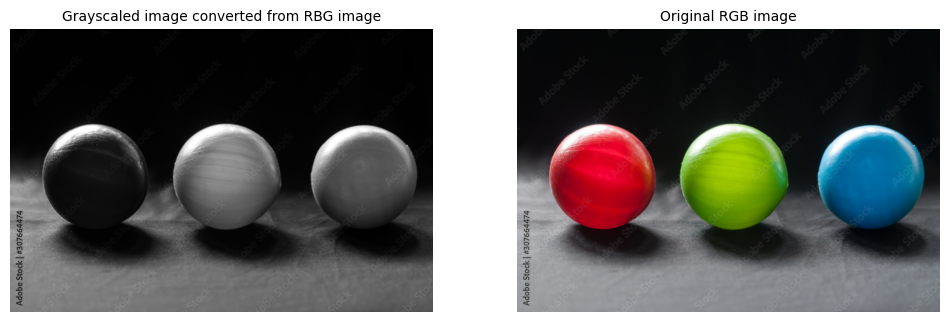

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(gray_image_default, cmap='gray')
plt.title("Grayscaled image converted from RBG image",fontsize=10)
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(RGB_image, cv.COLOR_BGR2RGB))
plt.title("Original RGB image",fontsize=10)
plt.axis(False)

In [8]:
#Create a function to plot the grayscale image and the image after sobel filter.
def plot(gray_image, sobel_image):
  plt.figure(figsize=(12,12))
  plt.subplot(1,2,1)
  plt.imshow(gray_image, cmap='gray')
  plt.title("Grayscaled image converted from RBG image")
  plt.axis(False)
  plt.subplot(1,2,2)
  plt.imshow(sobel_image)
  plt.title("Edge Detected image from Sobel filter")
  plt.axis(False)

In [9]:
filtered_image = sobel_without_np(gray_image_default)

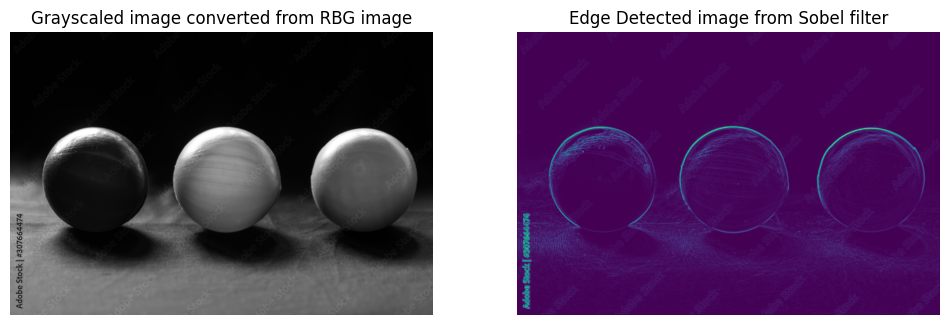

In [10]:
plot(gray_image_default, filtered_image)